<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-3" data-toc-modified-id="Chapter-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 3</a></span><ul class="toc-item"><li><span><a href="#Box-Jenkins-method" data-toc-modified-id="Box-Jenkins-method-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Box-Jenkins method</a></span></li></ul></li></ul></div>

## Chapter 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

To re-iterate, the PACF shows the correlation of a lag, removing the effect of all prior lags: I would like to know how that is done in practice!

If the ACF tails off slowly, but the PACF cuts off after a couple of lags - we have an AR model. And the AR order is given by the cut off lag of the PACF.

If the PACF tails off slowly, but the ACF cuts off after a couple of lags - we have an MA model. And the MA order is given by the cut off lag of the ACF.

If both the ACF and PACF tail off slowly, then we have an ARMA model.

I need to give some thought to why this is the case - I don't like following something by wrote when I don't grok the underlying patterns and processes.

In [2]:
from io import StringIO
df_str = ',y\n2013-01-01,1.6243453636632417\n2013-01-02,-0.9366254863827237\n2013-01-03,0.08148313956553188\n2013-01-04,-0.6635575866995296\n2013-01-05,0.7380229039818533\n2013-01-06,-2.954962335071106\n2013-01-07,2.142851205743089\n2013-01-08,-1.54100857400508\n2013-01-09,0.3042623964369783\n2013-01-10,-0.018096735692416654\n2013-01-11,1.3793316706890548\n2013-01-12,-2.331661680732742\n2013-01-13,0.45343220635629256\n2013-01-14,-0.49898074560151806\n2013-01-15,0.4958129392157721\n2013-01-16,-1.5385866233856953\n2013-01-17,0.272464572212477\n2013-01-18,-0.8332093239048626\n2013-01-19,-0.16391041215947277\n2013-01-20,0.25928647673116145\n2013-01-21,-1.4678756213178192\n2013-01-22,1.552356233411623\n2013-01-23,0.517304789575743\n2013-01-24,0.33540755457131693\n2013-01-25,1.414251410613761\n2013-01-26,-0.44267353117881636\n2013-01-27,0.43486043276610253\n2013-01-28,-0.8460529621283155\n2013-01-29,-0.3227196181820965\n2013-01-30,0.2663351847300741\n2013-01-31,-1.1588290992384715\n2013-02-01,-0.1796811603772645\n2013-02-02,-0.6562135802445408\n2013-02-03,-1.0342953850491856\n2013-02-04,-0.8273828706297481\n2013-02-05,-0.3381288752370333\n2013-02-06,-1.5697129605521591\n2013-02-07,0.25270454861743163\n2013-02-08,1.2739265532801984\n2013-02-09,0.1452153299099057\n2013-02-10,0.22802097800100674\n2013-02-11,-0.12870795230635146\n2013-02-12,-0.4045699184691542\n2013-02-13,1.5180469048439789\n2013-02-14,-0.7781193427802225\n2013-02-15,-0.36356830534148654\n2013-02-16,0.8412933207224692\n2013-02-17,1.8862156720073517\n2013-02-18,-0.4337161233847055\n2013-02-19,1.2805225055549858\n2013-02-20,0.8428539247024849\n2013-02-21,-0.19107529182796965\n2013-02-22,-0.7968561998244624\n2013-02-23,-0.1364629407697568\n2013-02-24,-0.5874561022469003\n2013-02-25,0.18084376172664796\n2013-02-26,0.5541876889017687\n2013-02-27,0.8766240858708821\n2013-02-28,0.527048890510558\n2013-03-01,1.359049347773295\n2013-03-02,-0.5664193518834536\n2013-03-03,1.7549662902901144\n2013-03-04,0.3015791563535738\n2013-03-05,-0.2511377349153269\n2013-03-06,1.0778761062534292\n2013-03-07,-0.10882424673396719\n2013-03-08,1.2038713234860725\n2013-03-09,1.4173748689868457\n2013-03-10,2.198429345577833\n2013-03-11,-1.0381775556326822\n2013-03-12,-0.0531968714453539\n2013-03-13,0.02108061945297368\n2013-03-14,-0.5912528002381973\n2013-03-15,0.25958760671384673\n2013-03-16,0.037072524968774\n2013-03-17,-1.7744664081031074\n2013-03-18,0.4557773910437779\n2013-03-19,0.3772455645582013\n2013-03-20,-0.6340217616927784\n2013-03-21,0.8725234222328104\n2013-03-22,-0.05730956528127537\n2013-03-23,0.14133933429499687\n2013-03-24,0.3886179160847834\n2013-03-25,0.24581350554849243\n2013-03-26,0.11203038730260453\n2013-03-27,0.25833261324106704\n2013-03-28,-0.5119586052500145\n2013-03-29,0.6068887533589942\n2013-03-30,-0.11918757841721848\n2013-03-31,1.017190103723199\n2013-04-01,1.12283661551283\n2013-04-02,0.3207643951746494\n2013-04-03,0.28620430275712494\n2013-04-04,-0.14845112822056428\n2013-04-05,0.49420187577310626\n2013-04-06,-0.31156340972756413\n2013-04-07,-0.42389250525782035\n2013-04-08,0.2626179186722637\n2013-04-09,-0.7086742974817335\n2013-04-10,0.7319551572407962\n2013-04-11,-0.7596561677346068\n2013-04-12,1.3373427747999254\n2013-04-13,0.23386114161556643\n2013-04-14,0.7460939368847571\n2013-04-15,-0.7252277464095656\n2013-04-16,0.6874858517152365\n2013-04-17,0.5562799677333488\n2013-04-18,-1.3794707158319017\n2013-04-19,0.19750327960444775\n2013-04-20,0.02191500268058505\n2013-04-21,-1.7456159619288945\n2013-04-22,0.5197016682985639\n2013-04-23,0.38097793711055594\n2013-04-24,-1.3461354488103323\n2013-04-25,0.8708451787187022\n2013-04-26,-1.386399194944339\n2013-04-27,0.07107018433107157\n2013-04-28,-1.896554482622082\n2013-04-29,1.0392785030252782\n2013-04-30,-0.3117233629011087\n2013-05-01,-0.25470345740343314\n2013-05-02,-0.3111427541422564\n2013-05-03,1.5440733286109234\n2013-05-04,1.472416990709498\n2013-05-05,-2.101823921000814\n2013-05-06,2.580017707166224\n2013-05-07,1.413153912500737\n2013-05-08,-0.17406380425348505\n2013-05-09,-0.40772593656956324\n2013-05-10,1.6928976589280733\n2013-05-11,-0.6119662663151678\n2013-05-12,-0.6685133818149765\n2013-05-13,-0.904546505468549\n2013-05-14,0.5610968441481854\n2013-05-15,0.1325057376860389\n2013-05-16,-0.9859482947708851\n2013-05-17,1.0482857915779982\n2013-05-18,-1.19767381616595\n2013-05-19,0.999842992014047\n2013-05-20,-0.30093442371505497\n2013-05-21,-0.2986273389177173\n2013-05-22,0.19009658094097162\n2013-05-23,0.847234589466736\n2013-05-24,0.49013971513288634\n2013-05-25,0.6095250817227245\n2013-05-26,0.517597484188107\n2013-05-27,0.43424397517854385\n2013-05-28,0.8029659967210119\n2013-05-29,0.17347520815206058\n2013-05-30,0.8449129120021066\n2013-05-31,-0.19136460853777829\n2013-06-01,-2.09830061959056\n2013-06-02,1.6375225446847694\n2013-06-03,1.1557283653148154\n2013-06-04,-0.4148354345005869\n2013-06-05,0.7793131526528854\n2013-06-06,0.6720895299235188\n2013-06-07,0.0105975240899214\n2013-06-08,-0.029759747298893253\n2013-06-09,-1.2021502899081422\n2013-06-10,-0.3231841460132918\n2013-06-11,-1.2249907322002824\n2013-06-12,-0.043529429082311805\n2013-06-13,-0.8006373703195641\n2013-06-14,0.33007125457338526\n2013-06-15,-0.2880980218330207\n2013-06-16,1.0808468712518715\n2013-06-17,0.11241931304183123\n2013-06-18,2.3914825571262672\n2013-06-19,-1.974540141938034\n2013-06-20,0.4536255854148632\n2013-06-21,1.119171871123285\n2013-06-22,1.5850450451328557\n2013-06-23,-0.6779288580585987\n2013-06-24,1.1223397282580136\n2013-06-25,0.4488592375779984\n2013-06-26,1.3152302257291915\n2013-06-27,-0.608392860794102\n2013-06-28,1.0690742735955043\n2013-06-29,-0.14257079214082022\n2013-06-30,-1.0907698425456342\n2013-07-01,0.676139943806461\n2013-07-02,-0.03723283690075996\n2013-07-03,0.904885609410428\n2013-07-04,-0.12407244275414121\n2013-07-05,-0.05634944963862132\n2013-07-06,1.041067166195982\n2013-07-07,-0.0901578541249762\n2013-07-08,0.21613736854709223\n2013-07-09,0.11180373748522196\n2013-07-10,1.3313817615513366\n2013-07-11,0.1996907143895782\n2013-07-12,2.156927924939784\n2013-07-13,1.1890743428031563\n2013-07-14,1.1190838838031207\n2013-07-15,-0.8545336777658536\n2013-07-16,1.4588388968170949\n2013-07-17,0.009301784233119614\n2013-07-18,0.4193595139779553\n2013-07-19,1.1890322053293543\n2013-07-20,-0.24039644779519387\n2013-07-21,1.4607993870614373\n2013-07-22,-0.5340373838336717\n2013-07-23,2.1942773892112966\n2013-07-24,-1.6444172252896596\n2013-07-25,-1.0765264338983505\n2013-07-26,-1.1117056311968077\n2013-07-27,-1.4882033990730377\n2013-07-28,-1.9644272295939833\n2013-07-29,1.417518928419443\n2013-07-30,-1.3206165736357454\n2013-07-31,-1.026286838218625\n2013-08-01,1.8717919563429164\n2013-08-02,-1.310153120414237\n2013-08-03,-1.1880364325563721\n2013-08-04,1.2815673143450388\n2013-08-05,-0.09881880356072414\n2013-08-06,-0.6679334529384636\n2013-08-07,1.9442916681004738\n2013-08-08,-0.09588477225067876\n2013-08-09,1.8829042781009555\n2013-08-10,0.6403434362140306\n2013-08-11,1.9820727177902862\n2013-08-12,0.4335487325586176\n2013-08-13,-0.6231610094781892\n2013-08-14,3.19377999957079\n2013-08-15,-1.3687504079609285\n2013-08-16,0.2792042463323262\n2013-08-17,-0.08955258801982646\n2013-08-18,-0.28669835724174686\n2013-08-19,0.013577420531660861\n2013-08-20,-0.11784159550809878\n2013-08-21,0.6324367494590629\n2013-08-22,1.793304037442568\n2013-08-23,-0.2200410736418118\n2013-08-24,-0.47307427211644726\n2013-08-25,-0.43418588826423044\n2013-08-26,-0.8353664850676801\n2013-08-27,-2.265676562565925\n2013-08-28,0.6054471925501442\n2013-08-29,-1.3652046262642927\n2013-08-30,-0.4660920605306191\n2013-08-31,0.15835039106493884\n2013-09-01,-1.6390016906080098\n2013-09-02,-0.675855214199212\n2013-09-03,0.4274212256131501\n2013-09-04,-0.19378420996274348\n2013-09-05,-0.6228612073843173\n2013-09-06,2.2871444972078634\n2013-09-07,-1.615223745357132\n2013-09-08,0.3263670693840136\n2013-09-09,-0.010399903634157881\n2013-09-10,-3.242131291333261\n2013-09-11,2.323397727658253\n2013-09-12,-0.9283511711677607\n2013-09-13,-1.3745226407749414\n2013-09-14,2.951249567685844\n2013-09-15,-0.028049898609426416\n2013-09-16,0.6143689582723838\n2013-09-17,0.09814700670450893\n2013-09-18,0.5321788457335311\n2013-09-19,-1.6001665384898258\n2013-09-20,0.9499294554212678\n2013-09-21,-0.9592808153864316\n2013-09-22,-0.01026040621808666\n2013-09-23,1.3014215555632684\n2013-09-24,-0.027779898277462522\n2013-09-25,0.6063487409197557\n2013-09-26,0.670046707644159\n2013-09-27,-0.6244067979660517\n2013-09-28,1.1443490652989672\n2013-09-29,1.2391264771956911\n2013-09-30,0.48095377259872096\n2013-10-01,1.446956831516923\n2013-10-02,-0.3636138505404406\n2013-10-03,-0.19921657672044368\n2013-10-04,-1.2650303910532463\n2013-10-05,0.9969076531494699\n2013-10-06,-1.1932294559224852\n2013-10-07,1.3880930299634384\n2013-10-08,-0.7684585102166774\n2013-10-09,0.06257257617086442\n2013-10-10,0.36830656169522946\n2013-10-11,0.5365388515666454\n2013-10-12,-0.22616498662359252\n2013-10-13,0.504037262603046\n2013-10-14,0.2689626956417777\n2013-10-15,0.2554446920570044\n2013-10-16,-1.0836118652459368\n2013-10-17,0.3623356908247003\n2013-10-18,-0.4845491029887572\n2013-10-19,-0.3301715572569938\n2013-10-20,0.47200588435236196\n2013-10-21,-0.8521664945154096\n2013-10-22,0.18228122331238783\n2013-10-23,-0.33696275281424876\n2013-10-24,0.24721853100550858\n2013-10-25,0.5867492769671769\n2013-10-26,-1.0763973559163995\n2013-10-27,1.137617280374489\n2013-10-28,1.8974048505908812\n2013-10-29,-1.995168039257714\n2013-10-30,0.259567615247846\n2013-10-31,-0.5361553024652853\n2013-11-01,-0.7933808479187777\n2013-11-02,1.1654437817148735\n2013-11-03,-0.659119737259862\n2013-11-04,-0.29423872123344846\n2013-11-05,1.2516027520533708\n2013-11-06,-0.9285675076139768\n2013-11-07,1.2215060409416085\n2013-11-08,0.0871842998100412\n2013-11-09,1.4848082776067926\n2013-11-10,-0.5104963617472886\n2013-11-11,3.671339891986918\n2013-11-12,0.43664374852422616\n2013-11-13,1.2005170883457126\n2013-11-14,0.9745280430966422\n2013-11-15,-0.2716099963268473\n2013-11-16,-0.5416317423029939\n2013-11-17,-0.19545926059849875\n2013-11-18,-1.248084059300417\n2013-11-19,0.1410058682297923\n2013-11-20,-1.1626067077751199\n2013-11-21,0.6319239652350597\n2013-11-22,0.6688786480772247\n2013-11-23,-0.9585692675297167\n2013-11-24,1.807015490724262\n2013-11-25,-0.4013947902863976\n2013-11-26,1.3489299413443847\n2013-11-27,0.49353200967434574\n2013-11-28,1.3098988372996576\n2013-11-29,-0.7434491898472622\n2013-11-30,0.5607583730112102\n2013-12-01,1.5103806157850033\n2013-12-02,-1.239466834492438\n2013-12-03,-1.510203274000966\n2013-12-04,-1.2851312124674896\n2013-12-05,-2.9144942383894823\n2013-12-06,-2.806812913528789\n2013-12-07,-1.3235153290508723\n2013-12-08,-0.025325456898447563\n2013-12-09,-1.4556758216131098\n2013-12-10,0.6720398854000385\n2013-12-11,0.07619268011467145\n2013-12-12,-0.00506333430477615\n2013-12-13,-0.10584786980057333\n2013-12-14,-0.17097333977732215\n2013-12-15,0.4481052005460082\n2013-12-16,-1.3709292466525307\n2013-12-17,1.3314188383236956\n2013-12-18,0.5035469263415289\n2013-12-19,-0.42881757575743107\n2013-12-20,1.423448425582108\n2013-12-21,-0.6449349333920545\n2013-12-22,-0.21385331361701887\n2013-12-23,0.2949231544376524\n2013-12-24,-0.5930440301786327\n2013-12-25,-0.5249815797362269\n2013-12-26,-0.5928875846967052\n2013-12-27,-0.6146928313556693\n2013-12-28,0.7143118671162307\n2013-12-29,-2.500139982679442\n2013-12-30,0.855661252226137\n2013-12-31,-0.6081822231284129\n2014-01-01,0.29785217797254027\n2014-01-02,0.40432813740633977\n2014-01-03,-2.738136225924797\n2014-01-04,1.514019638099715\n2014-01-05,-0.4728933348511313\n2014-01-06,-0.7023583692157807\n2014-01-07,-0.20037012742544769\n2014-01-08,1.0508571092336927\n2014-01-09,-0.7177288479975583\n2014-01-10,2.0327057102952124\n2014-01-11,0.32951490383775334\n2014-01-12,2.451457991422216\n2014-01-13,-0.4933694657649319\n2014-01-14,-0.7881555639686659\n2014-01-15,1.47166294668816\n2014-01-16,-0.052691748917802816\n2014-01-17,-0.44752152811441076\n2014-01-18,-1.075617167392264\n2014-01-19,0.12628271206682312\n2014-01-20,0.25653462625659273\n2014-01-21,-0.9037799615760408\n2014-01-22,-0.02812281558038235\n2014-01-23,-0.022119169087296553\n2014-01-24,-0.9888713152319933\n2014-01-25,-0.43367064119854365\n2014-01-26,-1.6527634425902884\n2014-01-27,1.6131905379021025\n2014-01-28,-1.4168375887814268\n2014-01-29,0.675106115182302\n2014-01-30,-0.7296318590529075\n2014-01-31,0.9995766205332167\n2014-02-01,-2.1953493544026434\n2014-02-02,1.2270400020699483\n2014-02-03,-0.543080769899968\n2014-02-04,1.8319148807023482\n2014-02-05,-1.4630809256112869\n2014-02-06,0.9602584333449953\n2014-02-07,0.5931770120789537\n2014-02-08,0.7904067517941362\n2014-02-09,-0.5363531116529858\n2014-02-10,0.651075100680473\n2014-02-11,-1.9167469410865874\n2014-02-12,-0.5025932846671806\n2014-02-13,0.000849026593858826\n2014-02-14,0.1220604582621424\n2014-02-15,-0.6161370083664954\n2014-02-16,2.5794398600689528\n2014-02-17,1.5957095389807148\n2014-02-18,0.11968343917517557\n2014-02-19,-1.25639107792461\n2014-02-20,-0.7849867551689449\n2014-02-21,-1.1645921993507946\n2014-02-22,0.014092060155718622\n2014-02-23,-0.6795234945310866\n2014-02-24,-2.054907589390539\n2014-02-25,0.6179177530867808\n2014-02-26,1.1239218818054344\n2014-02-27,-1.3943810557431682\n2014-02-28,-0.2596300161072498\n2014-03-01,2.576185032151388\n2014-03-02,-0.6949475750787709\n2014-03-03,-0.09844266057301465\n2014-03-04,1.0784086703804339\n2014-03-05,-0.18059297398788682\n2014-03-06,-0.4712722054972518\n2014-03-07,1.404484349759692\n2014-03-08,0.7504172715157922\n2014-03-09,0.8515154126792672\n2014-03-10,0.42618791019917635\n2014-03-11,1.7544468281918673\n2014-03-12,-0.057690352268302596\n2014-03-13,0.7897877307083595\n2014-03-14,1.269517553665975\n2014-03-15,0.7271891930988313\n2014-03-16,2.0780848517036374\n2014-03-17,0.6460924478604715\n2014-03-18,-0.9947370760346854\n2014-03-19,-0.15104649803469594\n2014-03-20,1.2123080487297615\n2014-03-21,-1.4545735609241275\n2014-03-22,0.5097767932294518\n2014-03-23,-0.6231163909327158\n2014-03-24,1.1877493475466052\n2014-03-25,-0.7244834869881713\n2014-03-26,1.5799024185209203\n2014-03-27,-0.6390409161658284\n2014-03-28,1.5465629978303501\n2014-03-29,0.7285316907907324\n2014-03-30,-0.6815013136324692\n2014-03-31,1.7812335642915786\n2014-04-01,-1.1358324972034184\n2014-04-02,-0.5291589626091436\n2014-04-03,0.9454132825748973\n2014-04-04,-1.2869147637026015\n2014-04-05,-0.4990014359987798\n2014-04-06,-0.1962213085654791\n2014-04-07,-1.2971445686465866\n2014-04-08,0.9637051147089299\n2014-04-09,-0.003705153174802356\n2014-04-10,-0.17758407044703828\n2014-04-11,0.40152640461218086\n2014-04-12,0.633589726740197\n2014-04-13,1.621987768806429\n2014-04-14,0.6204318161065197\n2014-04-15,-0.01800391079597402\n2014-04-16,1.6700021030193373\n2014-04-17,-0.16550121267580936\n2014-04-18,-0.09455532809106795\n2014-04-19,2.103865421856602\n2014-04-20,-0.8875629794805923\n2014-04-21,0.10484462181273907\n2014-04-22,-1.4220082609775506\n2014-04-23,-1.2813449318457488\n2014-04-24,0.0022017071134345922\n2014-04-25,-1.7914758187416695\n2014-04-26,0.3690361200047274\n2014-04-27,-1.2910932014577772\n2014-04-28,-0.5981877456791468\n2014-04-29,0.648195497047542\n2014-04-30,0.7613239754625758\n2014-05-01,0.2724725895186849\n2014-05-02,1.7199752076621717\n2014-05-03,2.081037557594286\n2014-05-04,1.2362614118231952\n2014-05-05,-0.2557303650027477\n2014-05-06,0.9017482925104134\n2014-05-07,0.6877593476426402\n2014-05-08,-0.8480214606674881\n2014-05-09,0.6923707050320809\n2014-05-10,-1.6049408620397074\n2014-05-11,-0.5016669809676164\n2014-05-12,0.35644226693448255\n2014-05-13,-3.0651977395047667\n2014-05-14,-0.7502196700434278\n2014-05-15,-0.3086378471114208\n2014-05-16,-2.7192905150566014\n2014-05-17,0.06337064494758836\n2014-05-18,-1.332105527667078\n2014-05-19,-0.6303671409237099\n2014-05-20,-0.42339188268326616\n2014-05-21,-0.08625285761901375\n2014-05-22,-0.7668206087644438\n2014-05-23,0.1815372574864883\n2014-05-24,-0.7314427432209951\n2014-05-25,0.5340741720293481\n2014-05-26,1.4291532932745659\n2014-05-27,-0.15541703057892423\n2014-05-28,0.8054600865071532\n2014-05-29,-0.6307781544692047\n2014-05-30,1.036189530271984\n2014-05-31,-1.1949821884323983\n2014-06-01,-0.7984262544111274\n2014-06-02,0.6997985612837048\n2014-06-03,-0.4005235037222441\n2014-06-04,0.9955453789932597\n2014-06-05,1.442985297471268\n2014-06-06,-0.44179268930967436\n2014-06-07,1.0013290164300543\n2014-06-08,2.0056983954322787\n2014-06-09,0.4910648419000284\n2014-06-10,1.0863788523768376\n2014-06-11,1.9816825852161086\n2014-06-12,-0.36196769203176776\n2014-06-13,1.3632805378791213\n2014-06-14,1.4924176362724038\n2014-06-15,1.3486557398240224\n2014-06-16,-0.5166162348729819\n2014-06-17,0.818612458340747\n2014-06-18,0.6774682557225058\n2014-06-19,-0.6828980852587831\n2014-06-20,-0.2947044813782034\n2014-06-21,0.7904799253579271\n2014-06-22,-0.6944543233487643\n2014-06-23,-1.6295753681141414\n2014-06-24,0.8186072976739931\n2014-06-25,-1.13925911595886\n2014-06-26,-1.0744520962241921\n2014-06-27,-1.4382255967292465\n2014-06-28,0.9801629654125084\n2014-06-29,-3.119057864960227\n2014-06-30,-1.419485783457553\n2014-07-01,-0.29996639108017686\n2014-07-02,0.10619092719123291\n2014-07-03,0.47136088836748224\n2014-07-04,-1.1309909591390288\n2014-07-05,0.8149627784023272\n2014-07-06,-1.4285129546648718\n2014-07-07,0.9135138895185475\n2014-07-08,-2.1852306445964977\n2014-07-09,0.0023419937030003113\n2014-07-10,0.9220162489276171\n2014-07-11,-0.9149383059780841\n2014-07-12,1.781579559714476\n2014-07-13,-0.9208693668300473\n2014-07-14,0.9175160087737937\n2014-07-15,0.9594897281048249\n2014-07-16,-0.4606134936990126\n2014-07-17,1.7809984069457154\n2014-07-18,0.48493786845372744\n2014-07-19,-1.3730947498044064\n2014-07-20,4.866425777319986\n2014-07-21,-0.46987289921297004\n2014-07-22,0.6739604983143428\n2014-07-23,-0.03810757299260503\n2014-07-24,0.5883264639131888\n2014-07-25,-0.8637372520546764\n2014-07-26,0.3412287322402018\n2014-07-27,0.1293470543952797\n2014-07-28,1.8339986773838965\n2014-07-29,0.07645666268509829\n2014-07-30,1.1524591383676572\n2014-07-31,0.868334012792442\n2014-08-01,-0.0262541176072226\n2014-08-02,0.11208646274185177\n2014-08-03,1.2048703566681012\n2014-08-04,0.46026009469110785\n2014-08-05,-0.5101670295169686\n2014-08-06,-0.4232395807601008\n2014-08-07,0.20045285503319848\n2014-08-08,0.6520586745557335\n2014-08-09,-0.6140712209788101\n2014-08-10,2.08014995349983\n2014-08-11,-0.7841841262971047\n2014-08-12,0.8123263059684904\n2014-08-13,-2.253222527852549\n2014-08-14,-0.2824360335394294\n2014-08-15,-0.9023867394497873\n2014-08-16,-0.3608294843423502\n2014-08-17,1.3370375239070718\n2014-08-18,-0.24664384161541897\n2014-08-19,2.1134087476850367\n2014-08-20,0.8945791885546817\n2014-08-21,1.300674316210635\n2014-08-22,-0.028745695445900943\n2014-08-23,1.9726322920172383\n2014-08-24,-1.1939033504255319\n2014-08-25,0.9854024129894587\n2014-08-26,-0.9574857034652241\n2014-08-27,-0.5010748325109015\n2014-08-28,-1.494845541094138\n2014-08-29,-0.6651294836331051\n2014-08-30,-0.1394782688960885\n2014-08-31,-0.7323192963912699\n2014-09-01,-1.383580152278453\n2014-09-02,1.8249967749717997\n2014-09-03,-0.3818876543295058\n2014-09-04,0.9775137200453832\n2014-09-05,1.1260020715194838\n2014-09-06,-0.4183272394788844\n2014-09-07,-1.274085699405461\n2014-09-08,-0.49030723070905585\n2014-09-09,0.6252663052457965\n2014-09-10,-2.1567186416080846\n2014-09-11,1.1196723433765814\n2014-09-12,-0.7241327773217612\n2014-09-13,0.44433992266687206\n2014-09-14,-1.8414506882374193\n2014-09-15,1.4660698180425509\n2014-09-16,-0.7023269156218381\n2014-09-17,0.6967061329964346\n2014-09-18,0.35091842936275874\n2014-09-19,1.0139385950849515\n2014-09-20,0.06116143618131219\n2014-09-21,1.0601205847711939\n2014-09-22,-1.4494044661162129\n2014-09-23,-0.5863688043256192\n2014-09-24,0.7117513007575826\n2014-09-25,-0.9613580701066687\n2014-09-26,-0.3274895263675045\n2014-09-27,0.07202726407429627\n2014-09-28,0.45726784004652427\n2014-09-29,-0.8161987158729233\n2014-09-30,0.725610192001882\n2014-10-01,-1.0453389618869064\n2014-10-02,-0.24900452045537885\n2014-10-03,0.9447568046261772\n2014-10-04,0.4773489258754552\n2014-10-05,-1.1380949572147667\n2014-10-06,1.6749268491489802\n2014-10-07,-1.21467985120342\n2014-10-08,0.8633038122179635\n2014-10-09,-2.1055809781050683\n2014-10-10,-0.829196007670001\n2014-10-11,-0.6352867876151038\n2014-10-12,-0.9694683248489091\n2014-10-13,0.9690867292475869\n2014-10-14,0.41663881832108324\n2014-10-15,1.7718066161105839\n2014-10-16,1.5897983973268461\n2014-10-17,0.21965499353081414\n2014-10-18,0.6248685679906334\n2014-10-19,1.3993603029852237\n2014-10-20,-0.33818002420348264\n2014-10-21,0.07572546266687699\n2014-10-22,-0.9710010725492974\n2014-10-23,0.12559375060635486\n2014-10-24,-3.217363301035291\n2014-10-25,-0.3304171271811355\n2014-10-26,-1.7579036991068795\n2014-10-27,-0.08558179068104355\n2014-10-28,-1.0479895679666784\n2014-10-29,-0.319511849294682\n2014-10-30,1.477086371875822\n2014-10-31,-1.5608060098297383\n2014-11-01,0.8318886187892026\n2014-11-02,-1.8691874106572326\n2014-11-03,0.24905985193635582\n2014-11-04,-0.08126249378802924\n2014-11-05,0.23615647370799875\n2014-11-06,-0.9206589288255799\n2014-11-07,0.8804345957664497\n2014-11-08,0.24257914483325044\n2014-11-09,-0.2565703494455909\n2014-11-10,0.34520594803431603\n2014-11-11,0.5232078356604204\n2014-11-12,0.344408953924568\n2014-11-13,-0.8915217939269291\n2014-11-14,-0.738234908522747\n2014-11-15,2.5657134481216044\n2014-11-16,0.7610345095404889\n2014-11-17,-1.3826167008413939\n2014-11-18,2.0562882887726808\n2014-11-19,0.6958230574577576\n2014-11-20,0.343406978405006\n2014-11-21,0.31342443685254007\n2014-11-22,-0.5413187311240159\n2014-11-23,0.2704737829609777\n2014-11-24,-0.6905840073465808\n2014-11-25,-0.10018956007359853\n2014-11-26,-0.49730959057470225\n2014-11-27,-0.18502697198822207\n2014-11-28,1.004688143601039\n2014-11-29,0.9068336258788697\n2014-11-30,-1.161151758218509\n2014-12-01,0.45102373253656536\n2014-12-02,-0.683977424733381\n2014-12-03,0.8895722195532215\n2014-12-04,-0.6793313624034458\n2014-12-05,1.590739662123418\n2014-12-06,-0.418072442664885\n2014-12-07,0.5384026155999233\n2014-12-08,-1.0624738807839194\n2014-12-09,1.4368005677043099\n2014-12-10,-1.01992813065797\n2014-12-11,-1.426482306903321\n2014-12-12,-0.01345296021550213\n2014-12-13,-2.740746242410298\n2014-12-14,-0.19412090608838092\n2014-12-15,-0.7503595899230682\n2014-12-16,-0.4354369146183674\n2014-12-17,1.4646937210906252\n2014-12-18,-0.4804280178449414\n2014-12-19,1.4035070529709932\n2014-12-20,0.5098871144984545\n2014-12-21,-0.10382544936162441\n2014-12-22,-1.702229312023272\n2014-12-23,1.3985366862920854\n2014-12-24,-1.37451128133072\n2014-12-25,-0.22003957489407347\n2014-12-26,-1.1409937892546373\n2014-12-27,0.39128227184065023\n2014-12-28,-0.3243197548702509\n2014-12-29,-0.2884281172640468\n2014-12-30,-0.023368747752872676\n2014-12-31,1.117411447496646\n2015-01-01,0.7247645513303406\n2015-01-02,0.8070002284422061\n2015-01-03,3.780527131665473\n2015-01-04,-0.7567997670816391\n2015-01-05,0.954626233148939\n2015-01-06,-0.12264416001398026\n2015-01-07,0.3450240806947857\n2015-01-08,-1.1929809942372216\n2015-01-09,-2.7345095114226905\n2015-01-10,-0.7491161365246245\n2015-01-11,-0.7008352160962409\n2015-01-12,-0.1781730051320436\n2015-01-13,-2.101224892856389\n2015-01-14,0.02355795351969492\n2015-01-15,-0.18100964666929426\n2015-01-16,-1.35148223417933\n2015-01-17,0.4513331112205858\n2015-01-18,-0.3625987051785564\n2015-01-19,0.2612536372982136\n2015-01-20,-0.6289187180126523\n2015-01-21,1.779159340107934\n2015-01-22,-0.4288669777410362\n2015-01-23,1.5370210430976994\n2015-01-24,-0.23685919202011652\n2015-01-25,1.0657913804655714\n2015-01-26,-0.5410260887302911\n2015-01-27,-0.7697199543029569\n2015-01-28,-0.5409717769642262\n2015-01-29,-0.3940845299794769\n2015-01-30,-0.7061379965260243\n2015-01-31,1.3578885961706366\n2015-02-01,-1.5359256750792014\n2015-02-02,-0.46445542132121953\n2015-02-03,2.035406647141924\n2015-02-04,-0.40296673904852454\n2015-02-05,-1.820212654690468\n2015-02-06,1.5662428137452795\n2015-02-07,-0.24390928286698413\n2015-02-08,-2.6071531171523947\n2015-02-09,0.27970692340392894\n2015-02-10,-0.5156758709853475\n2015-02-11,-0.01930843412746397\n2015-02-12,0.6921099499705909\n2015-02-13,0.11903190738726345\n2015-02-14,1.5200709041440363\n2015-02-15,-0.03789070396685465\n2015-02-16,-0.4894828975051896\n2015-02-17,-0.49652921960412955\n2015-02-18,0.4283506333905682\n2015-02-19,-2.6042017448785906\n2015-02-20,0.9519804236651237\n2015-02-21,-1.666791718925656\n2015-02-22,-0.5220179365761216\n2015-02-23,0.44859707301344326\n2015-02-24,0.6771253713199766\n2015-02-25,-2.1404218024125092\n2015-02-26,0.0989548219858013\n2015-02-27,-0.006524684305269569\n2015-02-28,-1.4299564259577877\n2015-03-01,0.7537054123846301\n2015-03-02,-2.422822578389135\n2015-03-03,0.8587407836884147\n2015-03-04,-0.013870390845990122\n2015-03-05,-0.5534803156245764\n2015-03-06,1.328737198279175\n2015-03-07,-1.3075214279701635\n2015-03-08,1.6999267476170528\n2015-03-09,-0.9628450107964297\n2015-03-10,0.8298473499937408\n2015-03-11,-0.3476054165771058\n2015-03-12,0.885973007596537\n2015-03-13,0.738005193506646\n2015-03-14,-1.4731058866331523\n2015-03-15,0.6167634385777797\n2015-03-16,-0.2666091729261456\n2015-03-17,-0.7049522319658513\n2015-03-18,-0.782164765716233\n2015-03-19,1.9034781723943772\n2015-03-20,-0.4592523115068202\n2015-03-21,1.8419291978594479\n2015-03-22,-0.26199148103387904\n2015-03-23,-0.4187332293358711\n2015-03-24,0.6403673334282898\n2015-03-25,-1.078969784348259\n2015-03-26,2.2239285884396836\n2015-03-27,-0.3619029908368844\n2015-03-28,1.6515873726375963\n2015-03-29,0.33591504433117014\n2015-03-30,0.13819244392448043\n2015-03-31,0.31280985241402287\n2015-04-01,0.19681042173175364\n2015-04-02,0.6713515757703368\n2015-04-03,-0.19462963093908342\n2015-04-04,-0.2948295389937292\n2015-04-05,-0.7134764126881501\n2015-04-06,-0.10400572414712103\n2015-04-07,0.06368015334674082\n2015-04-08,-1.2250639295607879e-05\n2015-04-09,0.039478044659419946\n2015-04-10,-0.2873023487448758\n2015-04-11,0.3988318814107529\n2015-04-12,0.35706492170074633\n2015-04-13,-0.2871906930446424\n2015-04-14,0.3353030627711882\n2015-04-15,-0.012481856704506689\n2015-04-16,0.9682653828752205\n2015-04-17,-0.6327408720086529\n2015-04-18,0.5026741571579254\n2015-04-19,0.5005106060359727\n2015-04-20,0.5708375583395023\n2015-04-21,1.5247693495273642\n2015-04-22,0.7122620325070181\n2015-04-23,1.1305446708598264\n2015-04-24,-0.9386781635865586\n2015-04-25,1.2828514755071407\n2015-04-26,1.911129667427794\n2015-04-27,-1.5479044514543518\n2015-04-28,0.01651881470612282\n2015-04-29,0.4283621156919719\n2015-04-30,0.5093196440520888\n2015-05-01,-0.04975124041247814\n2015-05-02,-0.34009601976683324\n2015-05-03,0.5232342450853926\n2015-05-04,1.0585249038675937\n2015-05-05,0.31127763530774033\n2015-05-06,2.594667659912698\n2015-05-07,1.0328089053752365\n2015-05-08,1.0828788952337232\n2015-05-09,1.574381927577181\n2015-05-10,-0.06415327718688862\n2015-05-11,-0.6174881158008332\n2015-05-12,0.447234357947753\n2015-05-13,0.058142459641564836\n2015-05-14,-1.7351399946368677\n2015-05-15,-0.04454440732946091\n2015-05-16,-0.5362012031785355\n2015-05-17,-0.23579826418022792\n2015-05-18,-0.5810782494576359\n2015-05-19,0.466105872323243\n2015-05-20,0.010645807247748412\n2015-05-21,1.0960942553561668\n2015-05-22,-1.7602704744858853\n2015-05-23,2.346890096581464\n2015-05-24,0.8909970402504697\n2015-05-25,-0.2494306229272068\n2015-05-26,1.5626993923356047\n2015-05-27,0.9168810873067743\n2015-05-28,-0.6484072177227465\n2015-05-29,0.6891844758008852\n2015-05-30,0.706018797725734\n2015-05-31,-0.017605445785642493\n2015-06-01,1.2722091896118854\n2015-06-02,0.21112923781152743\n2015-06-03,0.47009302454605967\n2015-06-04,-0.44005888037379043\n2015-06-05,-0.1582531708940711\n2015-06-06,-0.5929258983172025\n2015-06-07,1.4577245152436966\n2015-06-08,-0.347867870627138\n2015-06-09,-0.6737978607724395\n2015-06-10,1.1822804094039145\n2015-06-11,-0.499399659026577\n2015-06-12,-3.1956120750591186\n2015-06-13,1.1525836546981962\n2015-06-14,-2.6223996805248038\n2015-06-15,0.11683057410986286\n2015-06-16,-1.3988104066886637\n2015-06-17,-1.55834204946323\n2015-06-18,0.6711667894287292\n2015-06-19,-2.318938513298259\n2015-06-20,-0.43705529324541564\n2015-06-21,-0.006238398671104706\n2015-06-22,-0.010910846481720915\n2015-06-23,0.5497414892482542\n2015-06-24,0.05972477957293217\n2015-06-25,-0.41800397210733725\n2015-06-26,2.302875469874748\n2015-06-27,-1.2513473966055002\n2015-06-28,2.2522112690788876\n2015-06-29,-0.4178925379516269\n2015-06-30,1.6110729862829825\n2015-07-01,1.243027602742513\n2015-07-02,-1.0468991391495865\n2015-07-03,1.2337667261691907\n2015-07-04,0.691664515261581\n2015-07-05,0.3428287935738735\n2015-07-06,-0.005930913729419396\n2015-07-07,0.778659780677154\n2015-07-08,-0.30446828870498216\n2015-07-09,-1.0619686644853361\n2015-07-10,1.1905560221076412\n2015-07-11,-1.226434787371609\n2015-07-12,1.435354133305664\n2015-07-13,0.4537985074248715\n2015-07-14,-0.767113822854508\n2015-07-15,0.6119937430150875\n2015-07-16,-0.34120398316890854\n2015-07-17,-1.1297641644891627\n2015-07-18,0.5413321493427989\n2015-07-19,-0.9260817613539909\n2015-07-20,1.6165769104754448\n2015-07-21,0.5413975931019138\n2015-07-22,-0.7064440808143819\n2015-07-23,0.9048121177557674\n2015-07-24,-0.22874943491706573\n2015-07-25,-1.7889126912039486\n2015-07-26,1.1704290354152884\n2015-07-27,0.2261772656634714\n2015-07-28,0.5455637991471967\n2015-07-29,-0.07776875234018016\n2015-07-30,1.72297655211174\n2015-07-31,-0.2829961226136833\n2015-08-01,1.1606978008831998\n2015-08-02,1.8832681700582348\n2015-08-03,-0.004777228468199057\n2015-08-04,-0.6228680749928528\n2015-08-05,0.5527198678272393\n2015-08-06,0.32065443693725537\n2015-08-07,0.5708622136520702\n2015-08-08,-1.2805415102431543\n2015-08-09,0.594468183041502\n2015-08-10,0.2972734888835252\n2015-08-11,-0.008971600905692267\n2015-08-12,0.8362611867301166\n2015-08-13,-0.9300231418975247\n2015-08-14,0.16983621224500084\n2015-08-15,1.0812573210104717\n2015-08-16,-0.22083377049960795\n2015-08-17,0.5452601226693387\n2015-08-18,1.455737785125382\n2015-08-19,0.13120335854803716\n2015-08-20,0.9793039889638008\n2015-08-21,-0.0513514798196516\n2015-08-22,-1.09248020435064\n2015-08-23,-0.9622240131810474\n2015-08-24,-0.16450003391684956\n2015-08-25,-1.0065052003975816\n2015-08-26,-0.9809722244052713\n2015-08-27,0.411362880830089\n2015-08-28,-1.2101235773484411\n2015-08-29,0.18841491517287706\n2015-08-30,-0.21346718830359132\n2015-08-31,-1.0697646886657761\n2015-09-01,-2.1026636851965934\n2015-09-02,1.6583151207005913\n2015-09-03,-0.9161266801356276\n2015-09-04,-2.979956934622453\n2015-09-05,0.6383459568719259\n2015-09-06,-0.2251731562914313\n2015-09-07,-1.2340646040190182\n2015-09-08,0.6161659848280594\n2015-09-09,-1.0396394956052273\n2015-09-10,0.47547807283874866\n2015-09-11,-0.20639848037257333\n2015-09-12,-0.4117952052242937\n2015-09-13,-0.1479112934510672\n2015-09-14,0.17300163164115573\n2015-09-15,0.7715422360244737\n2015-09-16,-0.7230448869163824\n2015-09-17,0.038528226692295275\n2015-09-18,0.36279348059130984\n2015-09-19,-0.43347092124084596\n2015-09-20,0.3356297777892493\n2015-09-21,0.6532947821196066\n2015-09-22,1.2271664507146802\n2015-09-23,-0.043514020412238785\n2015-09-24,-1.6511652754244674\n2015-09-25,0.7382584862507076\n2015-09-26,-0.35032730870574275\n2015-09-27,-0.9618058627439661\n'
df = pd.read_csv(StringIO(df_str), parse_dates=True, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2013-01-01 to 2015-09-27
Data columns (total 1 columns):
y    1000 non-null float64
dtypes: float64(1)
memory usage: 15.6 KB


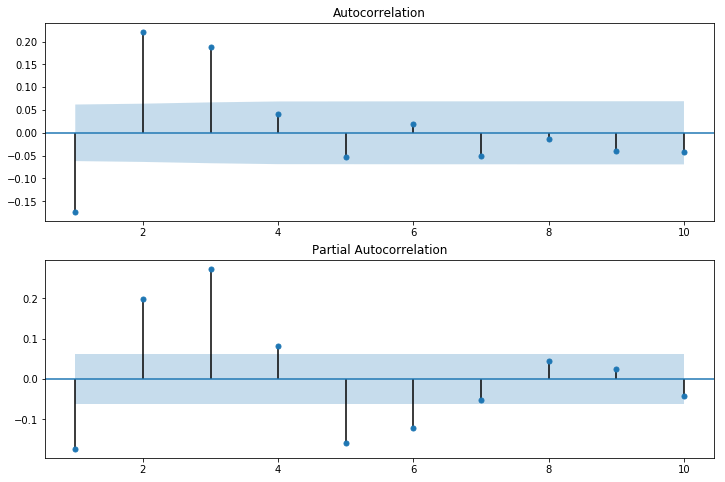

In [3]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2)

plt.show()

In [4]:
earthquake = pd.read_csv('earthquakes.csv',
                          index_col='date',
                          usecols=['date', 'earthquakes_per_year'],
                          parse_dates=True)
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99 entries, 1900-01-01 to 1998-01-01
Data columns (total 1 columns):
earthquakes_per_year    99 non-null float64
dtypes: float64(1)
memory usage: 1.5 KB


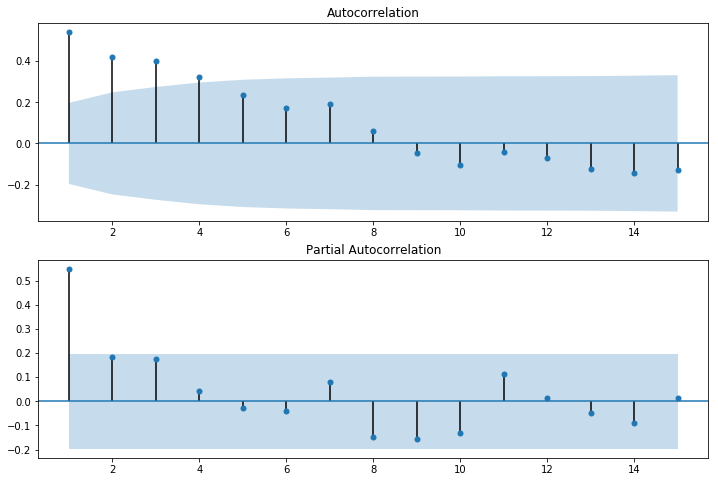

In [5]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=15, zero=False, ax=ax1)
plot_pacf(earthquake, lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

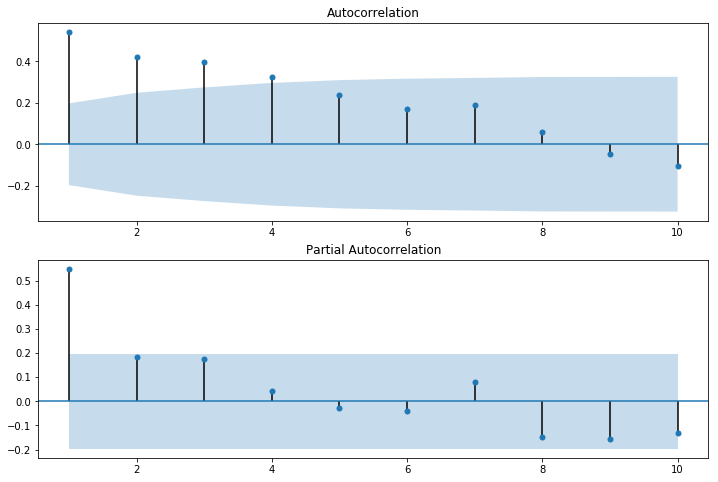

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [7]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=10, zero=False, ax=ax1)
plot_pacf(earthquake, lags=10, zero=False, ax=ax2)

# Show plot
plt.show()

# Instantiate model
model = SARIMAX(earthquake,
                order=(1,0,0),
                seasonal_order=(0,0,0,0))

# Train model
results = model.fit()

In [8]:
df_str = ',y\n2013-01-01,1.6243453636632417\n2013-01-02,0.5252853409141939\n2013-01-03,-0.9401577881818761\n2013-01-04,-1.6713417276989544\n2013-01-05,0.12284921978889918\n2013-01-06,-1.5842525336739506\n2013-01-07,0.32435068140440193\n2013-01-08,0.35087351594759997\n2013-01-09,0.054948254202457025\n2013-01-10,-0.17544496398335355\n2013-01-11,1.2987366468185126\n2013-01-12,-1.05058754783744\n2013-01-13,-1.7213970815275035\n2013-01-14,-0.8193228511645816\n2013-01-15,1.0786302614241974\n2013-01-16,-0.15892984171968028\n2013-01-17,-0.8757897192767916\n2013-01-18,-1.1777806483806474\n2013-01-19,-0.4871058711117918\n2013-01-20,0.6891250807446513\n2013-01-21,-0.5633343932808386\n2013-01-22,0.39765070482126386\n2013-01-23,1.5914422946311881\n2013-01-24,1.2610331745640901\n2013-01-25,1.1618751782681485\n2013-01-26,-0.22702956090094184\n2013-01-27,-0.6968652731122936\n2013-01-28,-1.1485791942200279\n2013-01-29,-0.847396556973193\n2013-01-30,0.3986971066398273\n2013-01-31,-0.19043012164344786\n2013-02-01,-0.8102862853671009\n2013-02-02,-1.050873972143431\n2013-02-03,-1.2732796561161686\n2013-02-04,-1.1811374898424711\n2013-02-05,-0.3808483669831366\n2013-02-06,-1.000403200329285\n2013-02-07,-0.4364597283391771\n2013-02-08,1.8227111778008114\n2013-02-09,2.040070330429363\n2013-02-10,0.3524609754379659\n2013-02-11,-1.266638958483965\n2013-02-12,-1.552693762017555\n2013-02-13,1.1811109466189382\n2013-02-14,1.3926616315763203\n2013-02-15,-0.4350962445098334\n2013-02-16,-0.4729439736284895\n2013-02-17,2.1217573871592483\n2013-02-18,1.6913770179466385\n2013-02-19,0.7483283186522127\n2013-02-20,0.43327465584513125\n2013-02-21,-0.25186498548809083\n2013-02-22,-1.4456325634350011\n2013-02-23,-1.1896667735546158\n2013-02-24,-0.4164048417193136\n2013-02-25,0.6160774000274155\n2013-02-26,1.3417368786994714\n2013-02-27,1.5460010304577176\n2013-02-28,0.8534810911731027\n2013-03-01,0.9462202156328189\n2013-03-02,-0.28717162883313646\n2013-03-03,0.6757134470581221\n2013-03-04,1.2742254423953878\n2013-03-05,0.15420403637147984\n2013-03-06,0.16069713492877719\n2013-03-07,0.13720387879828028\n2013-03-08,1.1104224388967332\n2013-03-09,2.2781545273121333\n2013-03-10,3.2548640035163343\n2013-03-11,-0.0014378772823995245\n2013-03-12,-2.6541165035128316\n2013-03-13,-1.8780587607156565\n2013-03-14,-0.07434360324288058\n2013-03-15,1.2934924200656241\n2013-03-16,1.0690189623563584\n2013-03-17,-1.8339400322335782\n2013-03-18,-1.8790703010993184\n2013-03-19,0.5085599536728176\n2013-03-20,1.0896666387289908\n2013-03-21,1.0792370753419118\n2013-03-22,0.18831412437122597\n2013-03-23,-0.44904250373115573\n2013-03-24,-0.0661174125773066\n2013-03-25,0.5546494805766092\n2013-03-26,0.5419387056985163\n2013-03-27,0.24998024945239977\n2013-03-28,-0.6564524942700304\n2013-03-29,-0.1376329263661819\n2013-03-30,0.36284740646395625\n2013-03-31,1.3145932235209177\n2013-04-01,1.972519928829759\n2013-04-02,0.9935609033892908\n2013-04-03,-0.3976580978457012\n2013-04-04,-1.1068539975218366\n2013-04-05,-0.08452238860498679\n2013-04-06,0.44275189289707584\n2013-04-07,-0.16318760264153173\n2013-04-08,-0.231451272766058\n2013-04-09,-0.6393599625159415\n2013-04-10,0.3045139622913964\n2013-04-11,0.05131043003349656\n2013-04-12,1.0001466154428693\n2013-04-13,1.1830766223391609\n2013-04-14,0.9098688435665614\n2013-04-15,-0.8211351078440788\n2013-04-16,-0.6968966063042845\n2013-04-17,0.7634674639972725\n2013-04-18,-0.28905846090938603\n2013-04-19,-0.8871097777990663\n2013-04-20,-0.28219409686593294\n2013-04-21,-1.2673077750693789\n2013-04-22,-0.5578410492040375\n2013-04-23,1.0583336446546148\n2013-04-24,-0.09198337856078109\n2013-04-25,-0.2325221401678445\n2013-04-26,-1.223424986109986\n2013-04-27,-0.8841319415604507\n2013-04-28,-1.6518051436558532\n2013-04-29,0.15639361156968035\n2013-04-30,1.2347467334331683\n2013-05-01,0.4780885570149673\n2013-05-02,-0.8885311811016144\n2013-05-03,0.6015142167576351\n2013-05-04,2.8347646225658587\n2013-05-05,-0.3410146213266274\n2013-05-06,-0.17628602623704048\n2013-05-07,2.1374334817242477\n2013-05-08,1.6655592475987206\n2013-05-09,-0.9918822757706292\n2013-05-10,-0.24703842764098582\n2013-05-11,0.2886827518012882\n2013-05-12,-0.5402762375559338\n2013-05-13,-1.6914458084113024\n2013-05-14,-0.34086425330277326\n2013-05-15,1.2490517500012626\n2013-05-16,0.13648039234888087\n2013-05-17,0.06229781290586589\n2013-05-18,-0.9447175893918107\n2013-05-19,0.04824963662337123\n2013-05-20,0.570730120038057\n2013-05-21,-0.0063737438509476885\n2013-05-22,-0.29243192845498045\n2013-05-23,0.7417329782279052\n2013-05-24,1.378972381826723\n2013-05-25,1.0949750992011484\n2013-05-26,0.4021853931334697\n2013-05-27,0.03456221001147154\n2013-05-28,0.5794402975403543\n2013-05-29,0.6467663112379596\n2013-05-30,0.8536910643992973\n2013-05-31,0.08965784629993134\n2013-06-01,-2.702725332504243\n2013-06-02,-0.7638596727947007\n2013-06-03,2.913896652380462\n2013-06-04,2.3430972326313637\n2013-06-05,0.19654038345724972\n2013-06-06,-0.5861641686985308\n2013-06-07,-0.3887894126342323\n2013-06-08,-0.02961625686048288\n2013-06-09,-1.046181959958185\n2013-06-10,-1.2738332860343422\n2013-06-11,-1.3767782046370196\n2013-06-12,-0.3082783738565722\n2013-06-13,-0.014249359045322263\n2013-06-14,0.4339357300873331\n2013-06-15,0.15641196068394758\n2013-06-16,0.8765903661119594\n2013-06-17,0.839762694160737\n2013-06-18,2.3527240245297394\n2013-06-19,-0.48221636277642466\n2013-06-20,-2.0206707711502205\n2013-06-21,0.13296225755696656\n2013-06-22,3.3329432949630164\n2013-06-23,1.7359860419846107\n2013-06-24,-0.2015777643050151\n2013-06-25,-0.6165171829306761\n2013-06-26,1.09629181356395\n2013-06-27,0.697465962214338\n2013-06-28,0.5551281204392085\n2013-06-29,-0.02072841925853447\n2013-06-30,-1.5177235446708648\n2013-07-01,-0.6466471611845181\n2013-07-02,0.7381544621995164\n2013-07-03,1.8452755788031507\n2013-07-04,0.8127951077966302\n2013-07-05,-0.7867574577009285\n2013-07-06,-0.08276998773552269\n2013-07-07,0.5983620261048717\n2013-07-08,0.573022519396298\n2013-07-09,0.09138767769969292\n2013-07-10,1.0439052879255069\n2013-07-11,1.128522195210945\n2013-07-12,2.1822313958694526\n2013-07-13,2.3018851616155436\n2013-07-14,1.3575917448351844\n2013-07-15,-1.4169179310487268\n2013-07-16,-0.745249784232529\n2013-07-17,0.7210185667052977\n2013-07-18,1.3444200811204747\n2013-07-19,1.627945074823764\n2013-07-20,0.23639815231701106\n2013-07-21,0.4089847724651875\n2013-07-22,-0.15728738236277273\n2013-07-23,1.6009727333995292\n2013-07-24,-0.0382511400212211\n2013-07-25,-2.625139115691955\n2013-07-26,-3.1348881966869557\n2013-07-27,-1.9662827263603844\n2013-07-28,-1.4382448107956716\n2013-07-29,1.470215846313126\n2013-07-30,1.1846457794563445\n2013-07-31,-1.4119250240344314\n2013-08-01,-0.08319400207278083\n2013-08-02,0.11665605607537632\n2013-08-03,-1.4198273348328654\n2013-08-04,-0.0681818346321944\n2013-08-05,1.2372086642146671\n2013-08-06,0.1991871538668245\n2013-08-07,1.0458717403762514\n2013-08-08,0.9660416711467273\n2013-08-09,1.7492283840103582\n2013-08-10,1.4810809025165863\n2013-08-11,1.8543804873727252\n2013-08-12,0.9930228783818722\n2013-08-13,-1.248952552368845\n2013-08-14,1.3881805488827563\n2013-08-15,1.1002179667805874\n2013-08-16,-0.364718249824299\n2013-08-17,-1.1093927183802206\n2013-08-18,-0.7434280164822666\n2013-08-19,0.16016180022733534\n2013-08-20,0.4956320986713758\n2013-08-21,0.8584096287042402\n2013-08-22,2.2149627928920412\n2013-08-23,1.0892056239284837\n2013-08-24,-1.3975374355616927\n2013-08-25,-2.312668776142409\n2013-08-26,-1.552974914533364\n2013-08-27,-1.94385633403011\n2013-08-28,-0.11721041591094716\n2013-08-29,0.18540650817725418\n2013-08-30,-0.4312063681199164\n2013-08-31,-0.29272868623056986\n2013-09-01,-1.398954349975821\n2013-09-02,-1.7811050983608472\n2013-09-03,0.07564432186446557\n2013-09-04,1.2673380572929913\n2013-09-05,0.16931627442888375\n2013-09-06,1.4305934127152682\n2013-09-07,-0.18619818797875132\n2013-09-08,-1.2092561181147534\n2013-09-09,-0.694371825036137\n2013-09-10,-2.851881221288618\n2013-09-11,0.10360481217810569\n2013-09-12,1.7428012278976457\n2013-09-13,-0.3959371701580957\n2013-09-14,1.1659962934673698\n2013-09-15,1.8351176993871905\n2013-09-16,0.9811269912136007\n2013-09-17,-0.5078733847046182\n2013-09-18,-0.4851640488989062\n2013-09-19,-1.5271657643440189\n2013-09-20,-0.17636295159032278\n2013-09-21,0.1960963863184242\n2013-09-22,0.07837437523092669\n2013-09-23,1.2399671761271482\n2013-09-24,1.1218853335208994\n2013-09-25,0.4649388546337319\n2013-09-26,0.29659087269343076\n2013-09-27,-0.6266823910851566\n2013-09-28,0.29537318601191054\n2013-09-29,2.0917094325987957\n2013-09-30,1.944587496996981\n2013-10-01,1.3534654410833908\n2013-10-02,-0.5061958602066139\n2013-10-03,-1.6412516767188632\n2013-10-04,-2.1791272444153464\n2013-10-05,0.3304148231308688\n2013-10-06,0.7736712565463362\n2013-10-07,1.4641904077757657\n2013-10-08,0.06254876532905618\n2013-10-09,-1.0243471078597377\n2013-10-10,-0.39939239136390725\n2013-10-11,1.0446718076987898\n2013-10-12,0.8226102438457297\n2013-10-13,0.2732735449414804\n2013-10-14,0.018437484022000475\n2013-10-15,0.13467528341651072\n2013-10-16,-1.0088798415538072\n2013-10-17,-0.6952599153300635\n2013-10-18,-0.16101015941041244\n2013-10-19,-0.04070714304754483\n2013-10-20,0.48959665255012896\n2013-10-21,-0.3287230942596786\n2013-10-22,-0.5533155425961135\n2013-10-23,-0.43141513766225387\n2013-10-24,0.2795958190860076\n2013-10-25,1.1218532262637875\n2013-10-26,-0.36088019790551873\n2013-10-27,-0.12889437847127316\n2013-10-28,2.3336552186996022\n2013-10-29,0.08103184355904425\n2013-10-30,-1.861056156320371\n2013-10-31,-1.7871695735781365\n2013-11-01,-0.7952684022903255\n2013-11-02,1.6300633913652147\n2013-11-03,1.3105650085964065\n2013-11-04,-0.6221957004424767\n2013-11-05,-0.10484564566134247\n2013-11-06,-0.2580976829585258\n2013-11-07,0.827030173838307\n2013-11-08,1.054360493795982\n2013-11-09,1.6617883258390058\n2013-11-10,0.18183191438759405\n2013-11-11,2.4885113242593\n2013-11-12,2.747114484382541\n2013-11-13,1.3108460830629856\n2013-11-14,0.054474541469403406\n2013-11-15,-0.9918993523492692\n2013-11-16,-1.4664722392760228\n2013-11-17,-0.7246465984629785\n2013-11-18,-0.7757602476170544\n2013-11-19,-0.12403095654135227\n2013-11-20,-0.5950843843869469\n2013-11-21,0.1369246040922667\n2013-11-22,1.3646490425653692\n2013-11-23,0.05861796619875215\n2013-11-24,0.6550054461403318\n2013-11-25,0.4239105319520439\n2013-11-26,1.0562831821448988\n2013-11-27,1.1323843499795885\n2013-11-28,1.4260535291384842\n2013-11-29,-0.34674927812121803\n2013-11-30,-0.8948373942551604\n2013-12-01,1.2096103032269407\n2013-12-02,0.5043854263739097\n2013-12-03,-2.375022397486642\n2013-12-04,-3.570853476269548\n2013-12-05,-3.8797278886501796\n2013-12-06,-3.5664878543283947\n2013-12-07,-1.5513055105236955\n2013-12-08,1.361778335274899\n2013-12-09,0.7879765563107248\n2013-12-10,0.11067294163440056\n2013-12-11,-0.10497397749485882\n2013-12-12,-0.0890744322047558\n2013-12-13,-0.17050679573276106\n2013-12-14,-0.27479703248475423\n2013-12-15,0.3431542116549471\n2013-12-16,-0.8336113614570733\n2013-12-17,0.22101985799008694\n2013-12-18,1.5570970338700936\n2013-12-19,0.5958749709862147\n2013-12-20,0.5947135724036667\n2013-12-21,-0.31994797904044714\n2013-12-22,-1.0326879025710767\n2013-12-23,-0.30444213424328564\n2013-12-24,-0.012510544735598539\n2013-12-25,-0.4676911792775898\n2013-12-26,-0.9897484966914026\n2013-12-27,-1.0298602504525847\n2013-12-28,0.6051624796845756\n2013-12-29,-1.180135113993868\n2013-12-30,-0.8999080280330838\n2013-12-31,-0.129384591676405\n2014-01-01,0.7744049473781495\n2014-01-02,1.064397416187951\n2014-01-03,-2.412066786816421\n2014-01-04,-1.4648666958662595\n2014-01-05,0.601086236242798\n2014-01-06,0.6248717440520121\n2014-01-07,-0.39268440566022633\n2014-01-08,0.4230320249359954\n2014-01-09,0.13372966768406064\n2014-01-10,1.6250183980832928\n2014-01-11,1.7590294920423641\n2014-01-12,2.5662863776332583\n2014-01-13,0.4876772449370621\n2014-01-14,-2.437093341046479\n2014-01-15,-0.8162441099086815\n2014-01-16,1.3811653359563039\n2014-01-17,0.9540401445134993\n2014-01-18,-1.5146702307599513\n2014-01-19,-1.708621581144661\n2014-01-20,0.22917503184247923\n2014-01-21,0.47349471369606466\n2014-01-22,-0.09344230799357085\n2014-01-23,-0.3445846779879953\n2014-01-24,-1.0887851848888868\n2014-01-25,-1.1643048082032668\n2014-01-26,-1.7712979564371745\n2014-01-27,0.8988093548123147\n2014-01-28,0.8557135019175578\n2014-01-29,0.36441321137516874\n2014-01-30,-0.8926606088852473\n2014-01-31,0.045093036803950604\n2014-02-01,-1.363289648976634\n2014-02-02,-0.24665477505294464\n2014-02-03,0.531539619622715\n2014-02-04,2.305250724546629\n2014-02-05,0.12297524203571109\n2014-02-06,-0.870390721276628\n2014-02-07,0.1120717411575709\n2014-02-08,1.5874915845323798\n2014-02-09,0.5241358426879192\n2014-02-10,-0.24293594213212302\n2014-02-11,-2.2855889176448745\n2014-02-12,-2.324245042520693\n2014-02-13,-0.12060732428107451\n2014-02-14,1.7134875177451265\n2014-02-15,0.6981011816354254\n2014-02-16,1.8103938665136505\n2014-02-17,2.9862893593554207\n2014-02-18,1.1772552333087234\n2014-02-19,-2.6818452997621787\n2014-02-20,-3.782972212865901\n2014-02-21,-2.0874079808571424\n2014-02-22,0.935069625589241\n2014-02-23,1.4546112148016355\n2014-02-24,-1.720769461786663\n2014-02-25,-1.8736180368556132\n2014-02-26,1.303923524315699\n2014-02-27,1.036440527188426\n2014-02-28,-0.8497440389033393\n2014-03-01,1.2924249384991622\n2014-03-02,1.4329354671360108\n2014-03-03,-0.28639763162577\n2014-03-04,-0.21400206360108626\n2014-03-05,0.15031049715022826\n2014-03-06,-0.3343828258201726\n2014-03-07,0.906422470081828\n2014-03-08,1.9378876403938543\n2014-03-09,1.6872240773566891\n2014-03-10,0.35204710081113977\n2014-03-11,0.8739148041420719\n2014-03-12,0.6008225924815109\n2014-03-13,0.45222605248140935\n2014-03-14,1.235847472079158\n2014-03-15,1.502628138568948\n2014-03-16,2.316911374467397\n2014-03-17,1.5617336739491088\n2014-03-18,-1.4984085521609156\n2014-03-19,-2.5956633997676675\n2014-03-20,0.4070214671906984\n2014-03-21,0.8499986776508054\n2014-03-22,0.42762118701714175\n2014-03-23,-0.7385533779026089\n2014-03-24,0.3532089102937592\n2014-03-25,0.2691936693079795\n2014-03-26,1.3142916578100456\n2014-03-27,0.39145803802704826\n2014-03-28,0.7598188682045299\n2014-03-29,1.2713035163638966\n2014-03-30,-0.2232061822175403\n2014-03-31,0.48881701264347754\n2014-04-01,-0.2707496171405749\n2014-04-02,-1.3621092727655189\n2014-04-03,0.03824155814945118\n2014-04-04,-0.05276316262297176\n2014-04-05,-0.8674571282576866\n2014-04-06,-0.8311224420649079\n2014-04-07,-1.2135747805246078\n2014-04-08,0.4470787879804904\n2014-04-09,1.4033510548534773\n2014-04-10,0.505666741563402\n2014-04-11,-0.2650937343514079\n2014-04-12,0.22613721727966027\n2014-04-13,2.066257217680123\n2014-04-14,2.1517535645879757\n2014-04-15,0.07220541257786428\n2014-04-16,0.16534726239446662\n2014-04-17,0.22735960619922296\n2014-04-18,-0.21136822326408658\n2014-04-19,1.6779897134115649\n2014-04-20,0.8733212110590138\n2014-04-21,-0.720361653563264\n2014-04-22,-2.5345519915769765\n2014-04-23,-2.7994645271116703\n2014-04-24,-0.442737679264762\n2014-04-25,-0.08740012404849418\n2014-04-26,0.29977293994754955\n2014-04-27,-0.8012936248586767\n2014-04-28,-1.5136009227252223\n2014-04-29,0.07382522457747853\n2014-04-30,2.0555884151637676\n2014-05-01,1.7787412332428856\n2014-05-02,1.5573246492309711\n2014-05-03,2.2951756561816214\n2014-05-04,2.0990145887113503\n2014-05-05,-0.3317351316613071\n2014-05-06,-0.9920441850682147\n2014-05-07,0.35679155649369115\n2014-05-08,0.1426776709474793\n2014-05-09,0.2574522667914344\n2014-05-10,-1.3496777246180418\n2014-05-11,-1.9166842637578911\n2014-05-12,-0.10764118016114732\n2014-05-13,-1.6744901141751671\n2014-05-14,-2.4833659049498613\n2014-05-15,-0.8709150674738881\n'
df = pd.read_csv(StringIO(df_str), parse_dates=True, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2013-01-01 to 2014-05-15
Data columns (total 1 columns):
y    500 non-null float64
dtypes: float64(1)
memory usage: 7.8 KB


In [9]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(df, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No f

In [10]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values(by='AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values(by='BIC'))

   p  q          AIC          BIC
7  2  1  1414.248679  1431.107112
8  2  2  1416.084892  1437.157932
5  1  2  1417.029939  1433.888371
6  2  0  1419.109454  1431.753279
2  0  2  1425.057439  1437.701264
4  1  1  1428.051695  1440.695520
1  0  1  1429.988724  1438.417940
3  1  0  1497.307531  1505.736748
0  0  0  1615.493870  1619.708478
   p  q          AIC          BIC
7  2  1  1414.248679  1431.107112
6  2  0  1419.109454  1431.753279
5  1  2  1417.029939  1433.888371
8  2  2  1416.084892  1437.157932
2  0  2  1425.057439  1437.701264
1  0  1  1429.988724  1438.417940
4  1  1  1428.051695  1440.695520
3  1  0  1497.307531  1505.736748
0  0  0  1615.493870  1619.708478


BIC will penalise model complexity more than AIC. As such, AIC is good for predictive models, and BIC is good for explanatory models.

In [11]:
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = SARIMAX(earthquake, order=(p,0,q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWar

0 0 888.4297722924081 891.0248921425426
0 1 799.6741727812074 804.8644124814766
0 2 761.0674787503887 768.8528383007924
1 0 666.6455255041611 671.8357652044303
1 1 647.1322999673836 654.9176595177873
1 2 648.7385664620149 659.1190458625532
2 0 656.0283744146394 663.8137339650432
2 1 None None


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


2 2 648.8506443433008 661.8262435939738


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


4.755625671846906


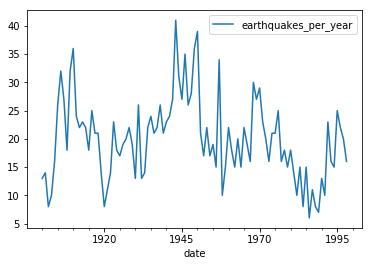

In [12]:
# Fit model
model = SARIMAX(earthquake, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot()
plt.show()

In [13]:
# Create and fit model
model1 = SARIMAX(df, order=(3,0,1))
results1 = model1.fit()

# Print summary
print(results1.summary())

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -703.063
Date:                Sun, 24 Nov 2019   AIC                           1416.127
Time:                        21:28:50   BIC                           1437.200
Sample:                    01-01-2013   HQIC                          1424.396
                         - 05-15-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5060      0.371      1.364      0.173      -0.221       1.233
ar.L2         -0.3456      0.241     -1.433      0.152      -0.818       0.127
ar.L3          0.0469      0.156      0.301      0.7

In [14]:
# Create and fit model
model2 = SARIMAX(df, order=(2,0,0))
results2 = model2.fit()

# Print summary
print(results2.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -706.555
Date:                Sun, 24 Nov 2019   AIC                           1419.109
Time:                        21:28:51   BIC                           1431.753
Sample:                    01-01-2013   HQIC                          1424.071
                         - 05-15-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6408      0.040     15.998      0.000       0.562       0.719
ar.L2         -0.3865      0.039     -9.822      0.000      -0.464      -0.309
sigma2         0.9873      0.063     15.706      0.0

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


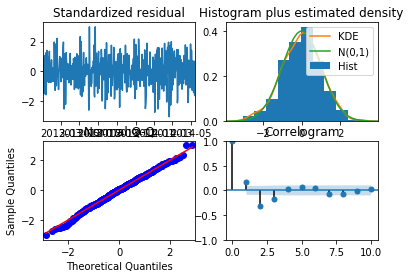

In [15]:
# Create and fit model
model = SARIMAX(df, order=(1,1,1))
results=model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

### Box-Jenkins method
Is a method to go from raw data to production model:
* Identification
* Estimation
* Model Diagnostics

In [21]:
savings_str = 'date,savings\n1955-01-01,4.9\n1955-04-01,5.2\n1955-07-01,5.7\n1955-10-01,5.7\n1956-01-01,6.2\n1956-04-01,6.7\n1956-07-01,6.9\n1956-10-01,7.1\n1957-01-01,6.6\n1957-04-01,7.0\n1957-07-01,6.9\n1957-10-01,6.4\n1958-01-01,6.6\n1958-04-01,6.4\n1958-07-01,7.0\n1958-10-01,7.3\n1959-01-01,6.0\n1959-04-01,6.3\n1959-07-01,4.8\n1959-10-01,5.3\n1960-01-01,5.4\n1960-04-01,4.7\n1960-07-01,4.9\n1960-10-01,4.4\n1961-01-01,5.1\n1961-04-01,5.3\n1961-07-01,6.0\n1961-10-01,5.9\n1962-01-01,5.9\n1962-04-01,5.6\n1962-07-01,5.3\n1962-10-01,4.5\n1963-01-01,4.7\n1963-04-01,4.6\n1963-07-01,4.3\n1963-10-01,5.0\n1964-01-01,5.2\n1964-04-01,6.2\n1964-07-01,5.8\n1964-10-01,6.7\n1965-01-01,5.7\n1965-04-01,6.1\n1965-07-01,7.2\n1965-10-01,6.5\n1966-01-01,6.1\n1966-04-01,6.3\n1966-07-01,6.4\n1966-10-01,7.0\n1967-01-01,7.6\n1967-04-01,7.2\n1967-07-01,7.5\n1967-10-01,7.0\n1968-01-01,7.6\n1968-04-01,7.2\n1968-07-01,7.5\n1968-10-01,7.8\n1969-01-01,7.2\n1969-04-01,7.5\n1969-07-01,5.6\n1969-10-01,5.7\n1970-01-01,4.9\n1970-04-01,5.1\n1970-07-01,6.2\n1970-10-01,6.0\n1971-01-01,6.1\n1971-04-01,7.5\n1971-07-01,7.8\n1971-10-01,8.0\n1972-01-01,8.0\n1972-04-01,8.1\n1972-07-01,7.6\n1972-10-01,7.1\n1973-01-01,6.6\n1973-04-01,5.6\n1973-07-01,5.9\n1973-10-01,6.6\n1974-01-01,6.8\n1974-04-01,7.8\n1974-07-01,7.9\n1974-10-01,8.7\n1975-01-01,7.7\n1975-04-01,7.3\n1975-07-01,6.7\n1975-10-01,7.5\n1976-01-01,6.4\n1976-04-01,9.7\n1976-07-01,7.5\n1976-10-01,7.1\n1977-01-01,6.4\n1977-04-01,6.0\n1977-07-01,5.7\n1977-10-01,5.0\n1978-01-01,4.2\n1978-04-01,5.1\n1978-07-01,5.4\n1978-10-01,5.1\n1979-01-01,5.3\n1979-04-01,5.0\n1979-07-01,4.8\n1979-10-01,4.7\n1980-01-01,5.0\n1980-04-01,5.4\n'
savings = pd.read_csv(StringIO(savings_str), 
                      parse_dates=True,
                      index_col='date')
savings.info()

from statsmodels.tsa.stattools import adfuller

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 1955-01-01 to 1980-04-01
Data columns (total 1 columns):
savings    102 non-null float64
dtypes: float64(1)
memory usage: 1.6 KB


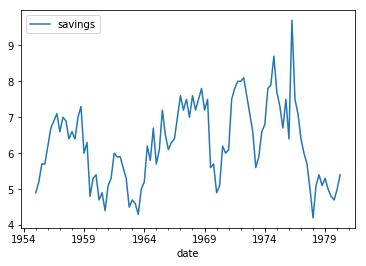

-3.18589909624214
0.020815541644114133


In [24]:
# Plot time series
savings.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(savings['savings'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

A negative value and pvalue < 0.05 says this time series is most likely stationary. Although visually, there appears to be cyclic pattern - albeit based on an exogenous variable - e.g. strength of economy = employment?

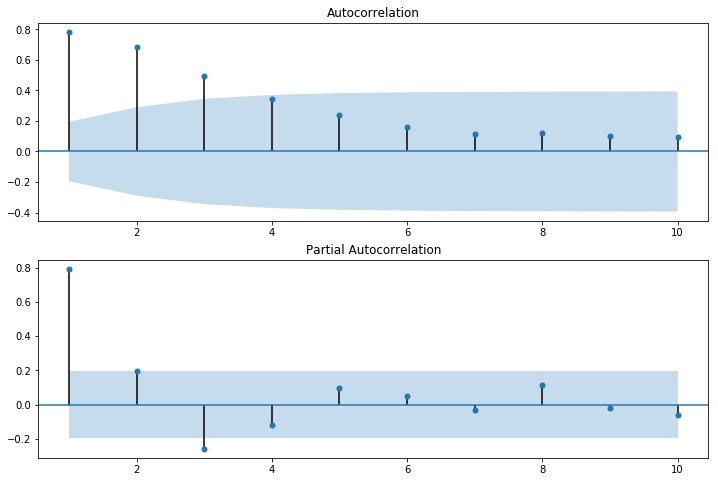

In [27]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(savings, lags=10, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(savings, lags=10, zero=False, ax=ax2)

plt.show()

In [28]:
# Loop over p values from 0-3
for p in range(4):
  
  # Loop over q values from 0-3
    for q in range(4):
      try:
        # Create and fit ARMA(p,q) model
        model = SARIMAX(savings, order=(p,0,q), trend='c')
        results = model.fit()
        
        # Print p, q, AIC, BIC
        print(p, q, results.aic, results.bic)
        
      except:
        print(p, q, None, None)

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWar

0 0 313.6028657326894 318.85281135925794
0 1 267.069709768869 274.94462820872184
0 2 232.16782676455594 242.66771801769303
0 3 217.59720511188743 230.7220691783088
1 0 216.20348059024596 224.07839903009878


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


1 1 215.7003898861577 226.2002811392948
1 2 207.65298608432553 220.77785015074687


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


1 3 209.57498691600873 225.32482379571434


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


2 0 213.9723232754438 224.4722145285809
2 1 None None


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


2 2 209.5790343679096 225.3288712476152


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


2 3 211.57503209218154 229.94984178517143
3 0 209.54493107912262 222.66979514554396


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


3 1 210.82147634942785 226.57131322913347


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


3 2 211.4575988181569 229.83240851114678


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


3 3 213.54396116786373 234.5437436741379


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


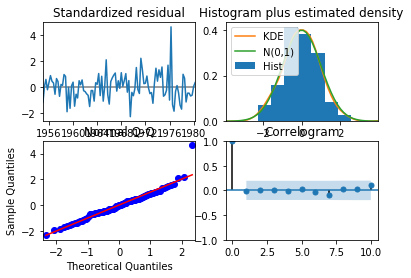

                           Statespace Model Results                           
Dep. Variable:                savings   No. Observations:                  102
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -98.826
Date:                Sun, 24 Nov 2019   AIC                            207.653
Time:                        21:47:36   BIC                            220.778
Sample:                    01-01-1955   HQIC                           212.968
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6813      0.714      2.356      0.018       0.283       3.080
ar.L1          0.7286      0.111      6.538      0.000       0.510       0.947
ma.L1         -0.0539      0.145     -0.372      0.7

In [31]:
# Create and fit model
model = SARIMAX(savings, order=(1,0,2), trend='c')
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

# Print summary
print(results.summary())